/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
(12500, 100, 100, 3)
1.0 0.0


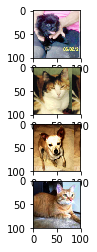

In [6]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
%matplotlib inline

##################
## from the teaching notebook
##############
def get_img(fname):
    N = 100
    img = misc.imread(fname)
    final = np.zeros((N,N,3))
    y, x, channels = img.shape
    if y > x:
        yy = N
        xx = int(x/ (y/N))
    else :
        xx = N
        yy = int(y/ (y/N))
    
    img = misc.imresize(img, (yy, xx))
    img = exposure.equalize_hist(img)
    final[0:img.shape[0], 0:img.shape[1], ] = img
    
    ## adding the repeting part
    final[:,xx:] = final[:, 0:N-xx]
    return final
###################
##############

im_n = 12500

im_list = []
for i in range(1,im_n+1):
    im = get_img("./test/{}.jpg".format(i))
    im_list.append(im)
    if i%500 == 0 : print (i)
    
im_list = np.array(im_list, dtype=np.float32)

print(im_list.shape)
print (np.max(im_list), np.min(im_list))

plt.subplot(411)
plt.imshow(im_list[500])
plt.subplot(412)
plt.imshow(im_list[501])
plt.subplot(413)
plt.imshow(im_list[502])
plt.subplot(414)
plt.imshow(im_list[503])


In [7]:
from keras.models import load_model
m = load_model("./july1.h5")

preds = m.predict(im_list)
print (preds)

pr = preds[:,0]
print ("preds OK")

f = open('july_preds1.csv', 'w')
print("id,label", file=f)

for i, pp in zip(range(1, im_n+1), pr): 
    print("{},{}".format(i, pp), file=f)
f.close()
print("file OK")

[[ 0.37775484  0.29244047]
 [ 0.37009084  0.27688175]
 [ 0.40345454  0.29546154]
 ..., 
 [ 0.37868515  0.2872352 ]
 [ 0.38488966  0.2797043 ]
 [ 0.38446003  0.28452122]]
preds OK
file OK
